# University Admission Probability Prediction Model

This project creates and trains a deep learning model to predict the probability of university admission. Below, you'll find an explanation of the project's steps and how to use the code.

## Steps

### Data Loading
The project uses the "admissions_data.csv" file, which contains various features affecting the probability of admission for students.

### Data Preprocessing
The data is split into training and test sets. Numeric data undergoes a scaling process.

### Model Creation
The deep learning model is constructed as a `Sequential` model. It consists of an input layer, hidden layers, and an output layer.

### Model Training
The model is trained on the training data, optimizing it with a loss function. Early stopping is employed to monitor and prevent overfitting.

### Results Evaluation
The model's performance is evaluated on the test data, and mean squared error (MSE) and mean absolute error (MAE) are calculated. Additionally, the R-squared value is computed.

### Visualization of Results
Graphs illustrating the model's performance during training are created and saved as "static/images/my_plots.png."

## Results

The project yields the following results:

- Mean Squared Error (MSE): 0.004264685325324535
- Mean Absolute Error (MAE): 0.04852209985256195
- R-squared Value: 0.808347931573698

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict.csv")

In [4]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
features = df.drop(columns=['Serial No.','Chance of Admit '])
labels = df.iloc[:,-1]

In [7]:
features_training_set,features_test_set,labels_training_set,labels_test_set = train_test_split(features,labels, test_size=0.27,random_state=42)

In [8]:
col = features_training_set.select_dtypes(include=np.number).columns
ct = ColumnTransformer([('Only numeric',StandardScaler(),col)],remainder='passthrough',verbose=1)
features_train_scaled = ct.fit_transform(features_training_set)
features_test_scaled = ct.transform(features_test_set)

[ColumnTransformer] .. (1 of 1) Processing Only numeric, total=   0.0s


In [9]:
my_model = Sequential(name='Admissions')

input = InputLayer(input_shape=(features_train_scaled.shape[1], ))
my_model.add(input)
my_model.add(Dense(64,activation='relu'))
my_model.add(Dense(8,activation='softmax'))
my_model.add(Dense(1))

opt = Adam(learning_rate=0.001)
my_model.compile(loss='mse', metrics=['mae'], optimizer=opt)
e_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
print(my_model.summary())

Model: "Admissions"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history = my_model.fit(features_train_scaled,labels_training_set,epochs=100,batch_size = 3, verbose = 1,validation_split = 0.12,callbacks=[e_stop])
res_mse,res_mae = my_model.evaluate(features_test_scaled,labels_test_set, verbose = 0)

Epoch 1/100
86/86 [==============================] - 1s 5ms/step - loss: 0.3770 - mae: 0.5573 - val_loss: 0.0822 - val_mae: 0.2618
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0536 - mae: 0.1897 - val_loss: 0.0205 - val_mae: 0.0948
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0204 - mae: 0.1085 - val_loss: 0.0134 - val_mae: 0.0729
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0145 - mae: 0.0895 - val_loss: 0.0106 - val_mae: 0.0619
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0117 - mae: 0.0798 - val_loss: 0.0090 - val_mae: 0.0566
Epoch 6/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0099 - mae: 0.0739 - val_loss: 0.0076 - val_mae: 0.0519
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0084 - mae: 0.0684 - val_loss: 0.0062 - val_mae: 0.0487
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0070 - m

In [11]:
print(f"MSE: {res_mse}")
print(f"MAE: {res_mae}")

MSE: 0.004320959094911814
MAE: 0.04843058064579964


In [12]:
predicted_values = my_model.predict(features_test_scaled) 
print(r2_score(labels_test_set, predicted_values)) 

4/4 [==============================] - 0s 2ms/step
0.8058190371563501


Text(0.5, 0, 'epoch')

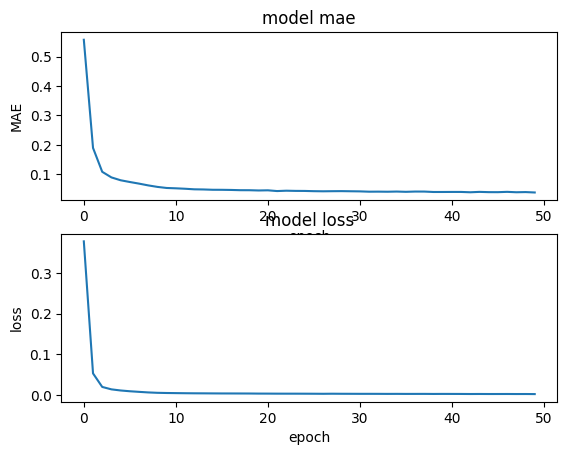

In [13]:
# Create and save the plots
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')